# __CS 105 Final Project Phase 3__: Machine Learning on Wildfires in the United States

##### Thi Nguyen, 862051496
##### Sydney Pun, 862053259
##### Heng Tan, 862155921


### Why did you analyze the United States' Fire Data when you already have datasets pertaining to Australia and Brazil? 

Wildfires are clearly an issue in the United States. A yearly analysis as presented in our EDA shows that they are occurring more frequeuntly as the years progress. 

Wildfires are occurring more frequently as the years progress. This is clearly a climate change issue. Australia and Brazil are two countries that in the recent years have been affected by the most wildfires in the global sphere. These occurrences have thus captured the attention of the global sphere.

As citizens of the U.S. because we are not living in these two countries, we may not be affected by this news. Essentially, we may turn a blind eye to this issue and simply shrug it off. But climate change is occurring at a truly alarming rate, as indicated by the increasing frequency of the United States' wildfire trends. 

As a result, by analyzing wildfires in the United States, we can see how the wildfire issue is affecting our home soil. This analysis thus seeks to shed light on this issue. 

[picture citation](https://www.bostonglobe.com/metro/2019/11/04/umass-study-invasive-grasses-are-contributing-wildfires-across/lAyX6GxsKlvq0DVMHtp6NJ/story.html)

![Wildfires in the U.S.](wildfires.png)

### __Implementing Machine Learning on "1.88 Million U.S. Wildfires"__ 

We will first use Machine Learning to predict the reasons for why wildfires occur in the United States. 

__HYPOTHESIS:__ Our hypothesis is that wildfires are __weather-related__ and can be linked to __climate change__.

__Let's see if this prediction is correct.__ 

First, let's import the ilbraries necessary for our project.

In [1]:
%pip install pandas

You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install sqlalchemy

You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install sklearn

You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# LIBRARIES 
import pandas as pd
import numpy as np
import sqlite3
%matplotlib inline
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plot_options = dict(figsize=(12,6))

Now we need to store our dataset into a dataframe. 

In [5]:
# CREATING A CONNECTION FOR THE SQLITE FILE
conn = sqlite3.connect("FPA_FOD_20170508.sqlite")
df = pd.read_sql_query("SELECT LATITUDE, LONGITUDE, FIRE_YEAR, FIRE_SIZE FROM Fires;", conn)
print(df.head())

    LATITUDE   LONGITUDE  FIRE_YEAR  FIRE_SIZE
0  40.036944 -121.005833       2005       0.10
1  38.933056 -120.404444       2004       0.25
2  38.984167 -120.735556       2004       0.10
3  38.559167 -119.913333       2004       0.10
4  38.559167 -119.933056       2004       0.10


In [6]:
# USING SAME SQL DATAFRAME THAT HAS BEEN CONVERTED TO CSV
df2 = pd.read_csv("filtered_groups_defg.csv")

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# DROP COLUMNS UNNECESSARY COLUMNS AND NaN VALUES
drop_cols = ['Unnamed: 0','OBJECTID', 'FOD_ID', 'FPA_ID','NWCG_REPORTING_UNIT_ID','NWCG_REPORTING_UNIT_NAME','SOURCE_REPORTING_UNIT','SOURCE_REPORTING_UNIT_NAME','LOCAL_FIRE_REPORT_ID','LOCAL_INCIDENT_ID','FIRE_CODE','FIRE_NAME','ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME','COMPLEX_NAME','DISCOVERY_DATE','STAT_CAUSE_CODE','FIPS_CODE', 'FIPS_NAME', 'Shape','OWNER_CODE','DISCOVERY_TIME','COUNTY','CONT_DATE','CONT_DOY','CONT_TIME','SOURCE_SYSTEM','SOURCE_SYSTEM_TYPE']
df2 = df2.drop(columns=drop_cols)

Now, we will train our data and apply regression testing. 

In [8]:
label_names = sorted(df2['STAT_CAUSE_DESCR'].unique())
df_dummies_X = df2.drop(columns=['STAT_CAUSE_DESCR'])
df_dummies_X = pd.get_dummies(df_dummies_X)
X = df_dummies_X
Y = df2['STAT_CAUSE_DESCR']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=1, stratify=Y)

Now we will train the classifier using the Random Forest Classifier. And printed below is our testing accuracy.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(n_estimators=200, max_depth=100, min_samples_leaf=5, random_state=123)

classifier.fit(X_train, Y_train)
training_accuracy = accuracy_score(Y_train, classifier.predict(X_train))
pred = classifier.predict(X_test)
test_accuracy = accuracy_score(Y_test, pred)

print(test_accuracy)

0.6014419077548757


Then, we will use a heatmap to visualize the predicted reasons for why fires are occurring in the United States. 

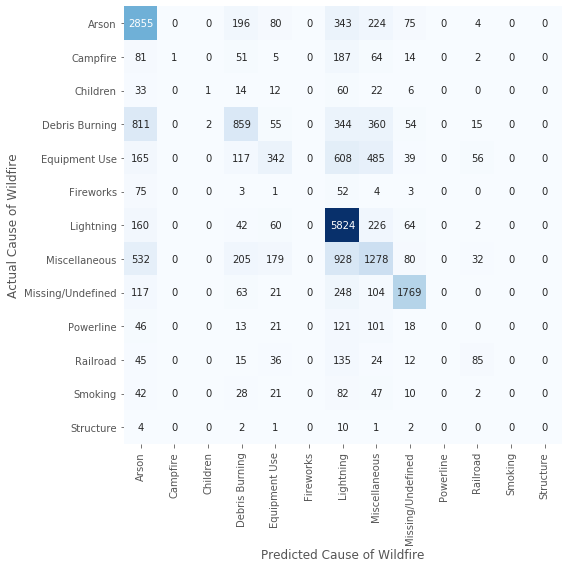

In [13]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, pred)
plt.figure(figsize=(8,8))
sb.heatmap(matrix,square=True,annot=True, fmt='d', cbar=False, cmap='Blues',
          xticklabels=label_names,yticklabels=label_names)
plt.ylabel('Actual Cause of Wildfire')
plt.xlabel('Predicted Cause of Wildfire')
plt.tight_layout()
plt.savefig("heatmapML.png", dpi=170)

This map clearly indicates that the wildfires are mainly occurring due to lightning strikes. With the heatmap, we see a clearer correlation between wildfire occurrences and weather. As a result, our prediction that these wildfires are linked to climate change was correct.

### __Implementing Machine Learning on "NIFC Wildland Fires"__

We will now use Linear Regression on the crawled NIFC Wildland Fires data. 

__HYPOTHESIS:__ Our hypothesis is that the __total acres of the wildfires will increase__ as the years progress.

__Let's see if this prediction is correct.__ 

In [14]:
%matplotlib inline

import pandas as pd
pd.options.display.max_rows = 5
nifc_df = pd.read_csv("NIFCWildlandFires.csv")

# REMOVING THE COMMA
nifc_df['Total Acres'] = nifc_df['Total Acres'].str.replace(',', '')
nifc_df['Year'] = nifc_df['Year'].str.replace(',', '')

# CASTING TO FLOAT
nifc_df['Total Acres'] = nifc_df['Total Acres'].astype(int)
nifc_df['Year'] = nifc_df['Year'].astype(int)

# DISPLAYING NEW DATAFRAME
nifc_df

,Year,Fire Name,State,Total Acres
0,2004,Taylor Complex,AK,1305592
1,2006,East Amarillo Complex,TX,907245
...,...,...,...,...
177,2000,Maudlow/Toston,MT,100000
178,2002,Vinasale,AK,100000


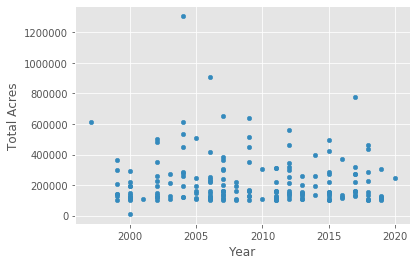

In [15]:
from sklearn.linear_model import LinearRegression

USA_train = nifc_df.loc[:].copy()
USA_test  = nifc_df.loc[:].copy()

X_train = USA_train[["Year"]]
X_test  = USA_test[["Year"]]
y_train = USA_train["Total Acres"]

USA_train.plot.scatter(x="Year", y="Total Acres")

In [16]:
from sklearn.linear_model import LinearRegression

X_train = USA_train[["Year"]]
X_test = USA_test[["Year"]]
y_train = USA_train["Total Acres"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

array([232505.25212678, 229655.49201299, 213981.81138715, 228230.61195609,
       225380.8518423 , 232505.25212678, 242479.41252504, 221106.21167162,
       232505.25212678, 225380.8518423 , 231080.37206988, 235355.01224056,
       216831.57150094, 235355.01224056, 221106.21167162, 212556.93133026,
       232505.25212678, 225380.8518423 , 212556.93133026, 216831.57150094,
       229655.49201299, 218256.45155783, 228230.61195609, 215406.69144404,
       228230.61195609, 239629.65241125, 235355.01224056, 225380.8518423 ,
       221106.21167162, 213981.81138715, 221106.21167162, 222531.09172852,
       222531.09172852, 211132.05127336, 223955.97178541, 228230.61195609,
       228230.61195609, 221106.21167162, 239629.65241125, 238204.77235435,
       212556.93133026, 232505.25212678, 216831.57150094, 232505.25212678,
       233930.13218367, 216831.57150094, 213981.81138715, 213981.81138715,
       232505.25212678, 235355.01224056, 219681.33161473, 218256.45155783,
       229655.49201299, 2

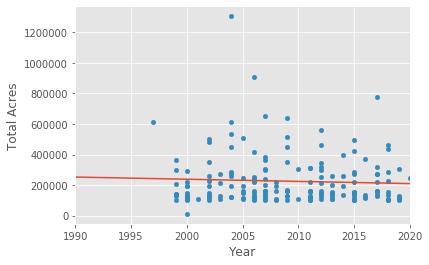

In [20]:
import numpy as np

X_new = pd.DataFrame()
# create a sequence of 400 evenly spaced numbers from 1990 to 2020
X_new["Year"] = np.linspace(1990, 2020, num=500)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    model.predict(X_new), # y values in Series.plot.line()
    index=X_new["Year"]    # x values in Series.plot.line()
)

# plot the data, then the model
USA_train.plot.scatter(x="Year", y="Total Acres")
y_new_.plot.line()

Let's fix any non-linearity to ensure that our model is producing an accurate result. 

In [18]:
USA_train["log(Total Acres)"] = np.log(USA_train["Total Acres"])

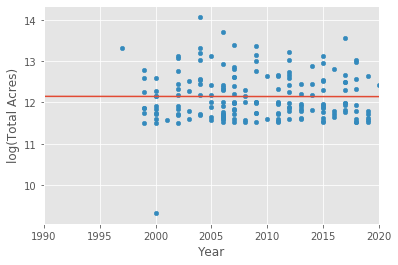

In [21]:
log_acre_model = LinearRegression()
log_acre_model.fit(X=USA_train[["Year"]],
                    y=USA_train["log(Total Acres)"])

X_new = pd.DataFrame()
X_new["Year"] = np.linspace(1990, 2020, num=500)
y_new_ = pd.Series(
    log_acre_model.predict(X_new),
    index=X_new["Year"]
)
    
USA_train.plot.scatter(x="Year", y="log(Total Acres)")
y_new_.plot.line()

When logging the Total Acres, the points are more evenly spread out.

Our prediction that the wildfires in the U.S. are getting larger as time progresses is actually incorrect.

But, let's predict the total acres for a wildfire in 2020 with an Ashen Model. 

In [23]:
ashen_model = LinearRegression()
ashen_model.fit(
    X=USA_train[["Year"]],
    y=USA_train["Total Acres"]
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
ashen_model.coef_

array([-1424.88005689])

In [26]:
ashen_model.intercept_

3087964.8861429133

In [27]:
value = ashen_model.coef_ * 2020 + ashen_model.intercept_
print(value)

[209707.17121647]


The estimated total acres for a wildfire in the year 2020 is predicted to be __209,707.17121647 acres__. 

This large value for the total acres burned down in a wildfire in 2020 clearly illustrates the wildfire issue in the United States.